In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import io
import csv
import math
import os
import zipfile

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:


# Sesuaikan (file_path) dengan lokasi penyimpanan dataset di penyimpanan google drive yang digunakan
file_path = 'D:\\`SKRIPSIBOWS\\Cabai Merah'
test_dir = 'D:\\`SKRIPSIBOWS\\Cabai Merah\\test'
train_dir = 'D:\\`SKRIPSIBOWS\\Cabai Merah\\train'

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1329 images belonging to 3 classes.
Found 333 images belonging to 3 classes.


In [12]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

In [14]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [16]:
import time

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

base_model.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 10

start_time = time.time()

history_mobilenet = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size
)

end_time = time.time()
training_time = end_time - start_time
print(f"Training selesai dalam waktu: {training_time} detik")

D:\ProgramData\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 407s 10s/step - accuracy: 0.6131 - loss: 0.9970 - val_accuracy: 0.8656 - val_loss: 0.2956
Epoch 2/10
 1/41 ━━━━━━━━━━━━━━━━━━━━ 18s 451ms/step - accuracy: 0.9062 - loss: 0.3384

D:\ProgramData\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9062 - loss: 0.3384 - val_accuracy: 0.8462 - val_loss: 0.3545
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 282s 7s/step - accuracy: 0.9010 - loss: 0.2385 - val_accuracy: 0.9156 - val_loss: 0.2286
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9375 - loss: 0.1746 - val_accuracy: 1.0000 - val_loss: 0.0634
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 349s 9s/step - accuracy: 0.9569 - loss: 0.1345 - val_accuracy: 0.9438 - val_loss: 0.1446
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9688 - loss: 0.1571 - val_accuracy: 1.0000 - val_loss: 0.0517
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 340s 8s/step - accuracy: 0.9761 - loss: 0.0884 - val_accuracy: 0.9219 - val_loss: 0.2397
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9688 - loss: 0.0611 - val_accuracy: 1.0000 - val_loss: 0.0160
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 423s 10s/step - accuracy: 0.9737 - loss: 0.0876 - val_accuracy: 0.9500 - val_loss: 0

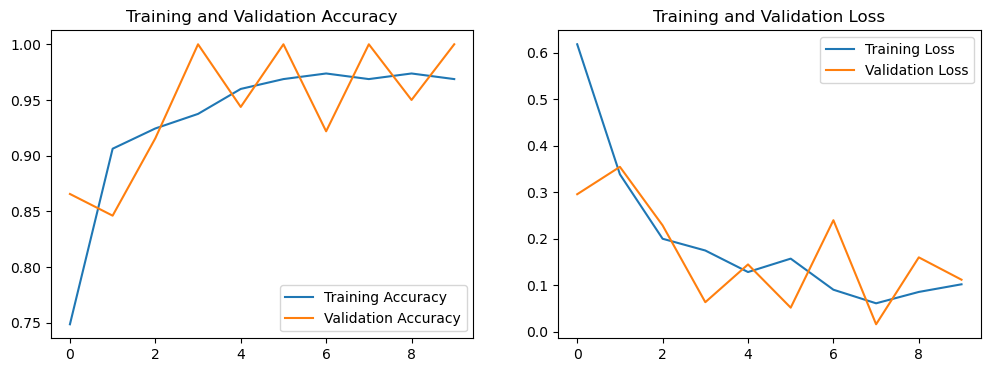

11/11 ━━━━━━━━━━━━━━━━━━━━ 84s 8s/step
Confusion Matrix:
[[100  10   1]
 [  1 107   3]
 [  0   0 111]]

Classification Report:
              precision    recall  f1-score   support

         dry       0.99      0.90      0.94       111
       fresh       0.91      0.96      0.94       111
      medium       0.97      1.00      0.98       111

    accuracy                           0.95       333
   macro avg       0.96      0.95      0.95       333
weighted avg       0.96      0.95      0.95       333



In [17]:
plot_training_history(history_mobilenet)

Y_pred = model.predict(validation_generator)
y_pred_mobilenet = np.argmax(Y_pred, axis=1)
true_classes_mobilenet = validation_generator.classes

cm = confusion_matrix(true_classes_mobilenet, y_pred_mobilenet)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(true_classes_mobilenet, y_pred_mobilenet, target_names=validation_generator.class_indices.keys()))

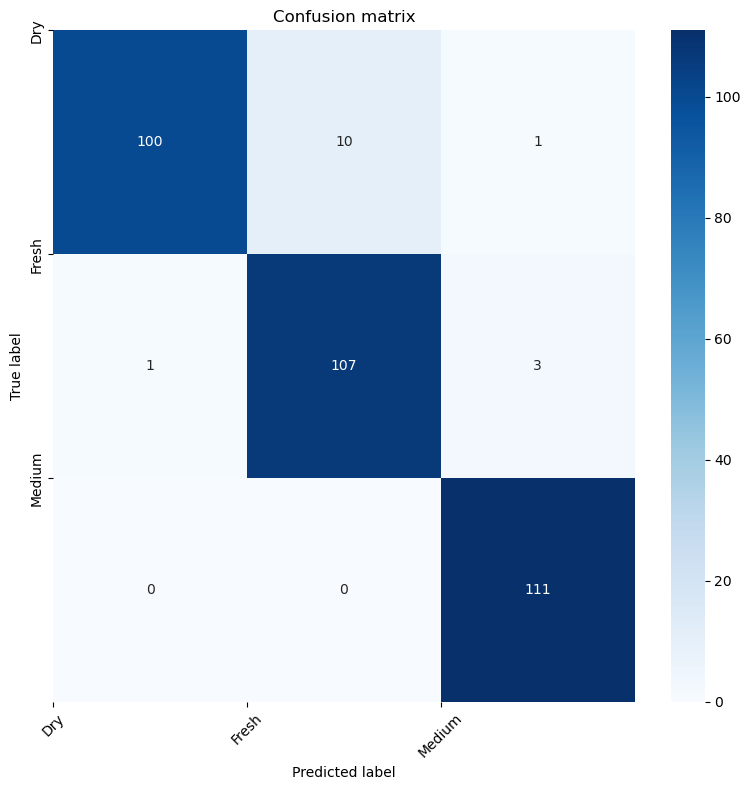

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming train_generator is already defined and contains the class indices
tick_marks = np.arange(len(train_generator.class_indices))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(tick_marks, train_generator.class_indices.keys(), rotation=45)
plt.yticks(tick_marks, train_generator.class_indices.keys())
plt.tight_layout()
plt.show()

In [19]:
import time

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

base_model.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 10

start_time = time.time()

history_densenet = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size
)

end_time = time.time()
training_time = end_time - start_time
print(f"Training selesai dalam waktu: {training_time} detik")

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 483s 11s/step - accuracy: 0.6364 - loss: 0.8301 - val_accuracy: 0.9344 - val_loss: 0.2217
Epoch 2/10
 1/41 ━━━━━━━━━━━━━━━━━━━━ 1:31 2s/step - accuracy: 1.0000 - loss: 0.2231

D:\ProgramData\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 1.0000 - loss: 0.2231 - val_accuracy: 0.9231 - val_loss: 0.1976
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 440s 11s/step - accuracy: 0.9163 - loss: 0.2203 - val_accuracy: 0.9719 - val_loss: 0.1432
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.9688 - loss: 0.1111 - val_accuracy: 1.0000 - val_loss: 0.1150
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 444s 11s/step - accuracy: 0.9557 - loss: 0.1463 - val_accuracy: 0.9719 - val_loss: 0.1234
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9375 - loss: 0.1320 - val_accuracy: 1.0000 - val_loss: 0.0510
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 342s 8s/step - accuracy: 0.9703 - loss: 0.0958 - val_accuracy: 0.9781 - val_loss: 0.0917
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9688 - loss: 0.0917 - val_accuracy: 1.0000 - val_loss: 0.0356
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 462s 11s/step - accuracy: 0.9747 - loss: 0.0716 - val_accuracy: 0.9781 - val_loss:

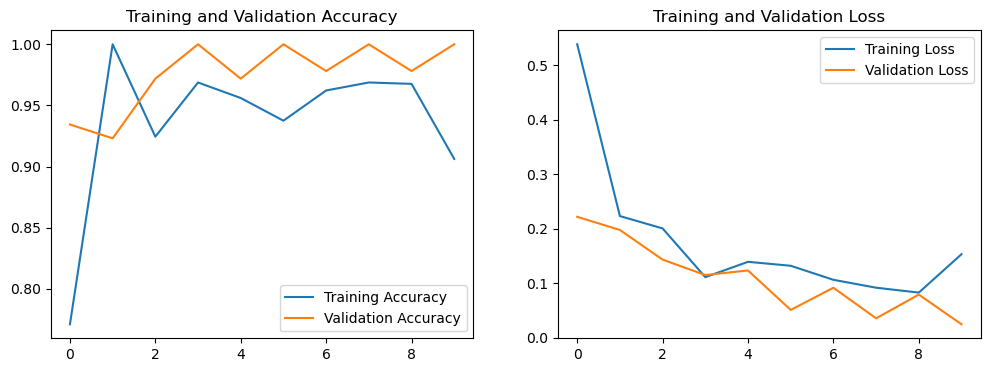

11/11 ━━━━━━━━━━━━━━━━━━━━ 112s 9s/step
Confusion Matrix:
[[110   0   1]
 [  3 104   4]
 [  0   0 111]]

Classification Report:
              precision    recall  f1-score   support

         dry       0.97      0.99      0.98       111
       fresh       1.00      0.94      0.97       111
      medium       0.96      1.00      0.98       111

    accuracy                           0.98       333
   macro avg       0.98      0.98      0.98       333
weighted avg       0.98      0.98      0.98       333



In [20]:
plot_training_history(history_densenet)

Y_pred = model.predict(validation_generator)
y_pred_densenet = np.argmax(Y_pred, axis=1)
true_classes_densenet = validation_generator.classes

cm = confusion_matrix(true_classes_densenet, y_pred_densenet)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(true_classes_densenet, y_pred_densenet, target_names=validation_generator.class_indices.keys()))

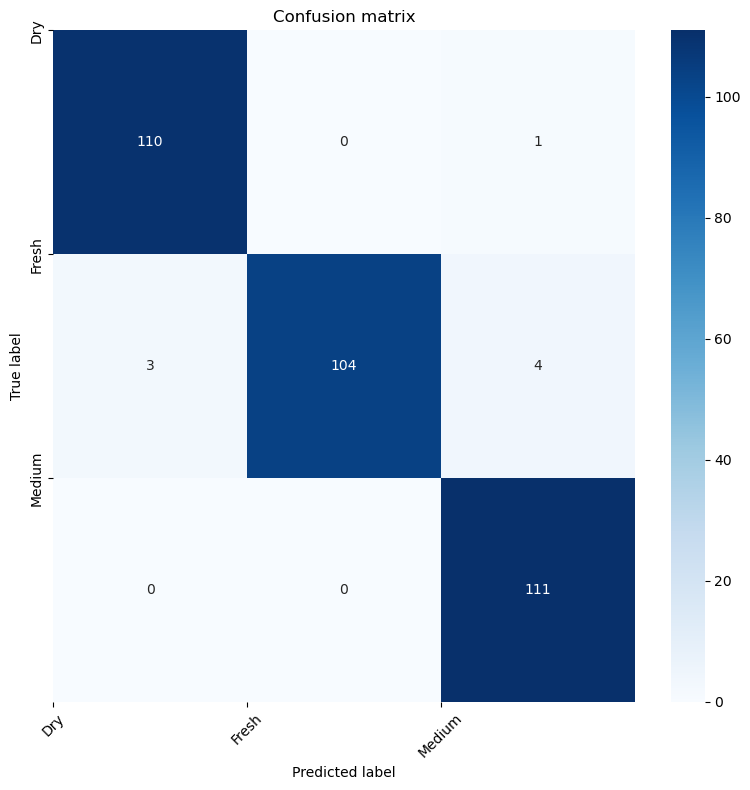

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


tick_marks = np.arange(len(train_generator.class_indices))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(tick_marks, train_generator.class_indices.keys(), rotation=45)
plt.yticks(tick_marks, train_generator.class_indices.keys())
plt.tight_layout()
plt.show()

In [22]:
import time

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

base_model.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 10

start_time = time.time()

history_inception = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size
)

end_time = time.time()
training_time = end_time - start_time
print(f"Training selesai dalam waktu: {training_time} detik")

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 559s 13s/step - accuracy: 0.6027 - loss: 1.2783 - val_accuracy: 0.7906 - val_loss: 0.4992
Epoch 2/10
 1/41 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.8750 - loss: 0.4171

D:\ProgramData\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.8750 - loss: 0.4171 - val_accuracy: 1.0000 - val_loss: 0.1252
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 542s 13s/step - accuracy: 0.8352 - loss: 0.3857 - val_accuracy: 0.9094 - val_loss: 0.3088
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8438 - loss: 0.4149 - val_accuracy: 1.0000 - val_loss: 0.1583
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 504s 12s/step - accuracy: 0.8857 - loss: 0.3295 - val_accuracy: 0.8906 - val_loss: 0.2866
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9062 - loss: 0.2468 - val_accuracy: 1.0000 - val_loss: 0.0640
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 511s 13s/step - accuracy: 0.8994 - loss: 0.2649 - val_accuracy: 0.9219 - val_loss: 0.2504
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9375 - loss: 0.2891 - val_accuracy: 0.9231 - val_loss: 0.2962
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 511s 13s/step - accuracy: 0.9243 - loss: 0.2043 - val_accuracy: 0.8813 - val_loss

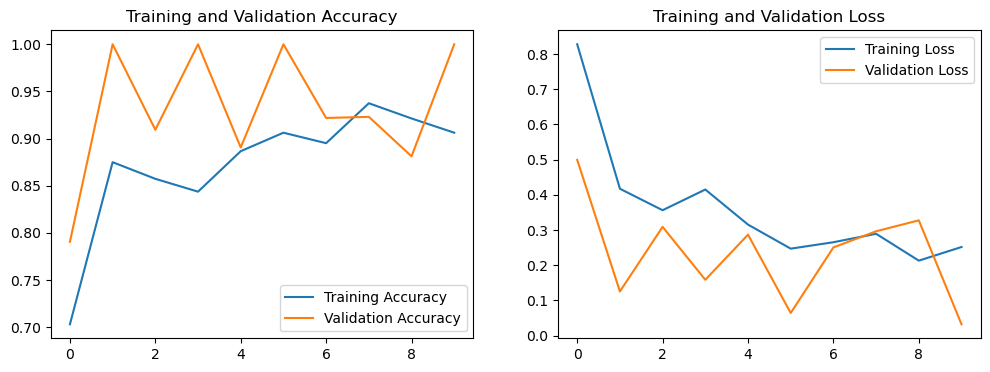

11/11 ━━━━━━━━━━━━━━━━━━━━ 101s 9s/step
Confusion Matrix:
[[ 78  27   6]
 [  1 102   8]
 [  0   0 111]]

Classification Report:
              precision    recall  f1-score   support

         dry       0.99      0.70      0.82       111
       fresh       0.79      0.92      0.85       111
      medium       0.89      1.00      0.94       111

    accuracy                           0.87       333
   macro avg       0.89      0.87      0.87       333
weighted avg       0.89      0.87      0.87       333



In [23]:
plot_training_history(history_inception)

Y_pred = model.predict(validation_generator)
y_pred_inception = np.argmax(Y_pred, axis=1)
true_classes_inception = validation_generator.classes

cm = confusion_matrix(true_classes_inception, y_pred_inception)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(true_classes_inception, y_pred_inception, target_names=validation_generator.class_indices.keys()))

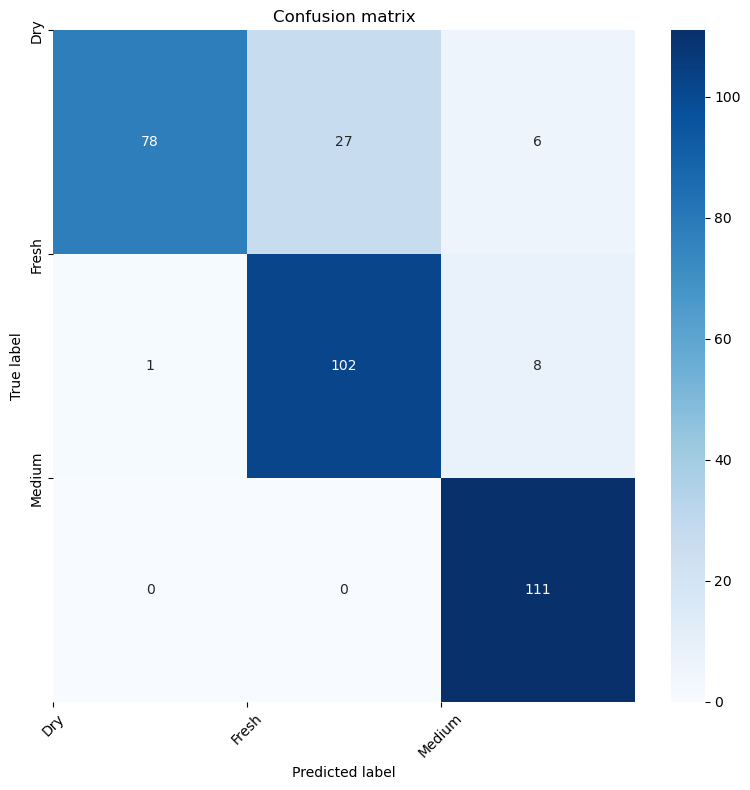

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


tick_marks = np.arange(len(train_generator.class_indices))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(tick_marks, train_generator.class_indices.keys(), rotation=45)
plt.yticks(tick_marks, train_generator.class_indices.keys())
plt.tight_layout()
plt.show()

In [25]:
import time

from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

base_model = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

base_model.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 10

start_time = time.time()

history_nasnetmobile = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size
)

end_time = time.time()
training_time = end_time - start_time
print(f"Training selesai dalam waktu: {training_time} detik")

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 643s 15s/step - accuracy: 0.6325 - loss: 0.7770 - val_accuracy: 0.8625 - val_loss: 0.3279
Epoch 2/10
 1/41 ━━━━━━━━━━━━━━━━━━━━ 23s 597ms/step - accuracy: 0.9062 - loss: 0.3462

D:\ProgramData\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.9062 - loss: 0.3462 - val_accuracy: 0.9231 - val_loss: 0.1592
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 586s 14s/step - accuracy: 0.8953 - loss: 0.2988 - val_accuracy: 0.9531 - val_loss: 0.1725
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.9375 - loss: 0.2406 - val_accuracy: 1.0000 - val_loss: 0.1153
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 671s 17s/step - accuracy: 0.8950 - loss: 0.2550 - val_accuracy: 0.9625 - val_loss: 0.1271
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.9375 - loss: 0.2424 - val_accuracy: 1.0000 - val_loss: 0.0298
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 644s 16s/step - accuracy: 0.9438 - loss: 0.1803 - val_accuracy: 0.8969 - val_loss: 0.2739
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.9062 - loss: 0.1578 - val_accuracy: 1.0000 - val_loss: 0.0076
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 538s 13s/step - accuracy: 0.9184 - loss: 0.2168 - val_accuracy: 0.9531 - val_

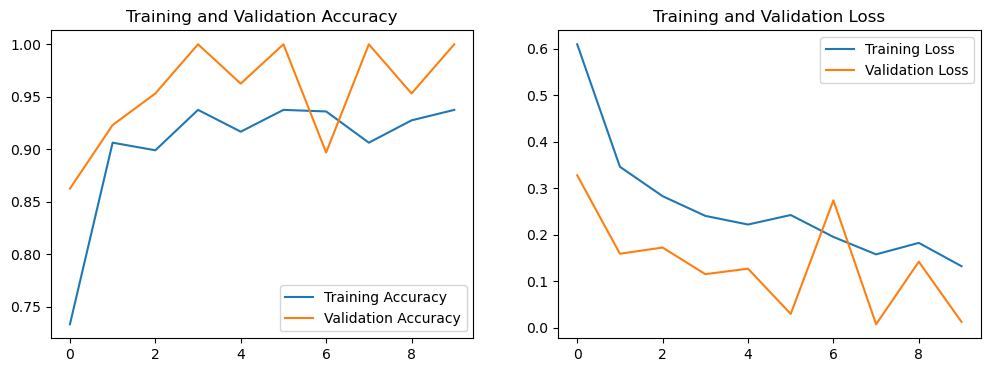

11/11 ━━━━━━━━━━━━━━━━━━━━ 111s 9s/step
Confusion Matrix:
[[104   2   5]
 [  1 104   6]
 [  0   0 111]]

Classification Report:
              precision    recall  f1-score   support

         dry       0.99      0.94      0.96       111
       fresh       0.98      0.94      0.96       111
      medium       0.91      1.00      0.95       111

    accuracy                           0.96       333
   macro avg       0.96      0.96      0.96       333
weighted avg       0.96      0.96      0.96       333



In [26]:
plot_training_history(history_nasnetmobile)

Y_pred = model.predict(validation_generator)
y_pred_nasnetmobile = np.argmax(Y_pred, axis=1)
true_classes_nasnetmobile = validation_generator.classes

cm = confusion_matrix(true_classes_nasnetmobile, y_pred_nasnetmobile)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(true_classes_nasnetmobile, y_pred_nasnetmobile, target_names=validation_generator.class_indices.keys()))

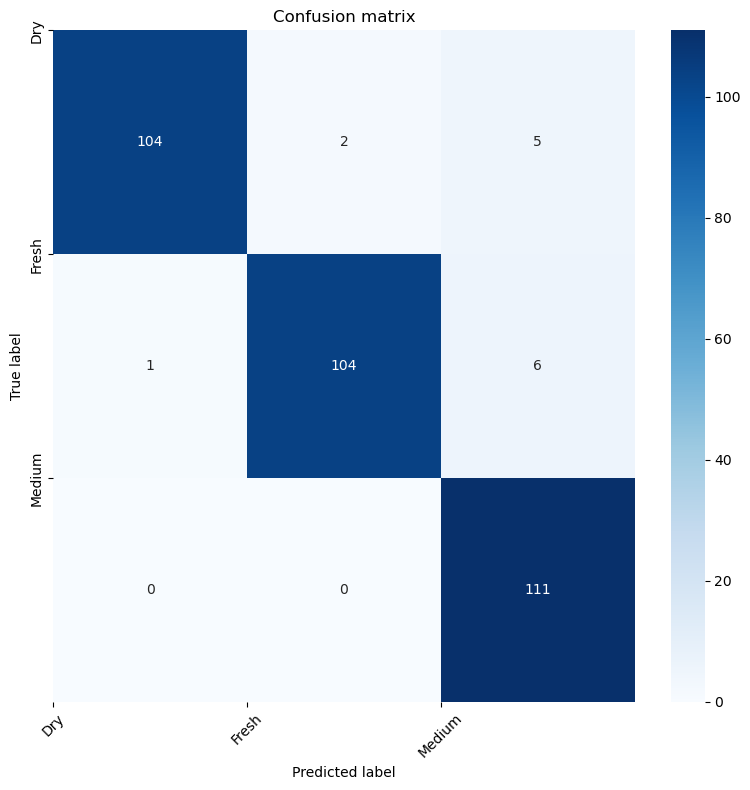

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


tick_marks = np.arange(len(train_generator.class_indices))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(tick_marks, train_generator.class_indices.keys(), rotation=45)
plt.yticks(tick_marks, train_generator.class_indices.keys())
plt.tight_layout()
plt.show()

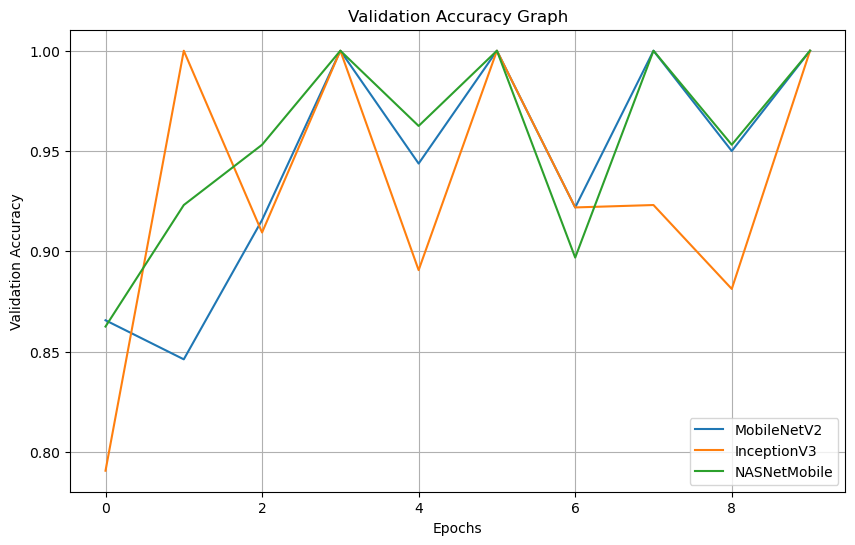

In [40]:
# Mengambil data accuracy dari tiga model saja
acc_history_mobilenet = history_mobilenet.history['accuracy']
acc_history_inception = history_inception.history['accuracy']
acc_history_nasnetmobile = history_nasnetmobile.history['accuracy']

combined_acc = [acc_history_mobilenet, acc_history_inception, acc_history_nasnetmobile]

val_acc_history_mobilenet = history_mobilenet.history['val_accuracy']
val_acc_history_inception = history_inception.history['val_accuracy']
val_acc_history_nasnetmobile = history_nasnetmobile.history['val_accuracy']

combined_val_acc = [val_acc_history_mobilenet, val_acc_history_inception, val_acc_history_nasnetmobile]

# Plotting accuracy
plt.figure(figsize=(10, 6))
for val_acc in combined_val_acc:
    plt.plot(range(len(val_acc)), val_acc)

plt.title('Validation Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend(['MobileNetV2', 'InceptionV3', 'NASNetMobile'], loc='lower right')
plt.grid(True)
plt.show()

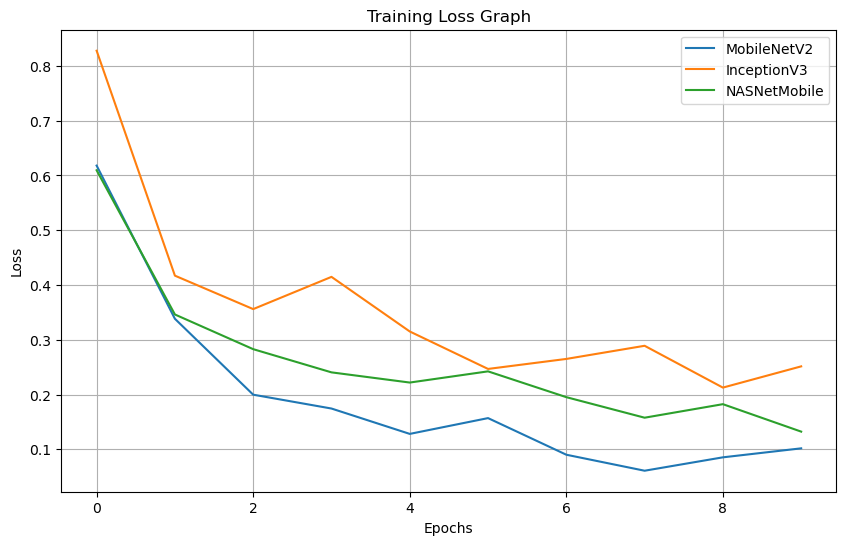

In [42]:
# Mengambil data loss dari tiga model saja
loss_history_mobilenet = history_mobilenet.history['loss']
loss_history_inception = history_inception.history['loss']
loss_history_nasnetmobile = history_nasnetmobile.history['loss']

combined_loss = [loss_history_mobilenet, loss_history_inception, loss_history_nasnetmobile]

# Plotting training loss
plt.figure(figsize=(10, 6))
for loss in combined_loss:
    plt.plot(range(len(loss)), loss)

plt.title('Training Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['MobileNetV2', 'InceptionV3', 'NASNetMobile'], loc='upper right')
plt.grid(True)
plt.show()

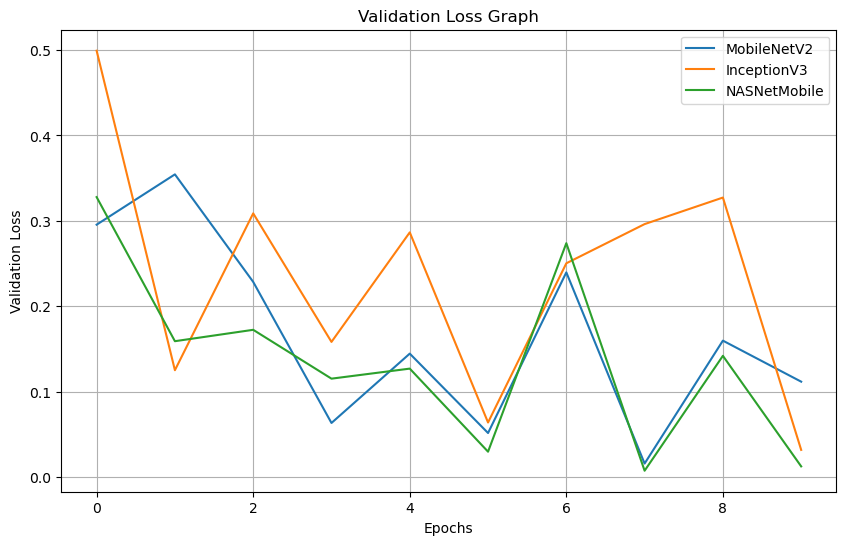

In [44]:
# Mengambil data validation loss dari tiga model saja
val_loss_history_mobilenet = history_mobilenet.history['val_loss']
val_loss_history_inception = history_inception.history['val_loss']
val_loss_history_nasnetmobile = history_nasnetmobile.history['val_loss']

combined_val_loss = [val_loss_history_mobilenet, val_loss_history_inception, val_loss_history_nasnetmobile]

# Plotting validation loss
plt.figure(figsize=(10, 6))
for val_loss in combined_val_loss:
    plt.plot(range(len(val_loss)), val_loss)

plt.title('Validation Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend(['MobileNetV2', 'InceptionV3', 'NASNetMobile'], loc='upper right')
plt.grid(True)
plt.show()

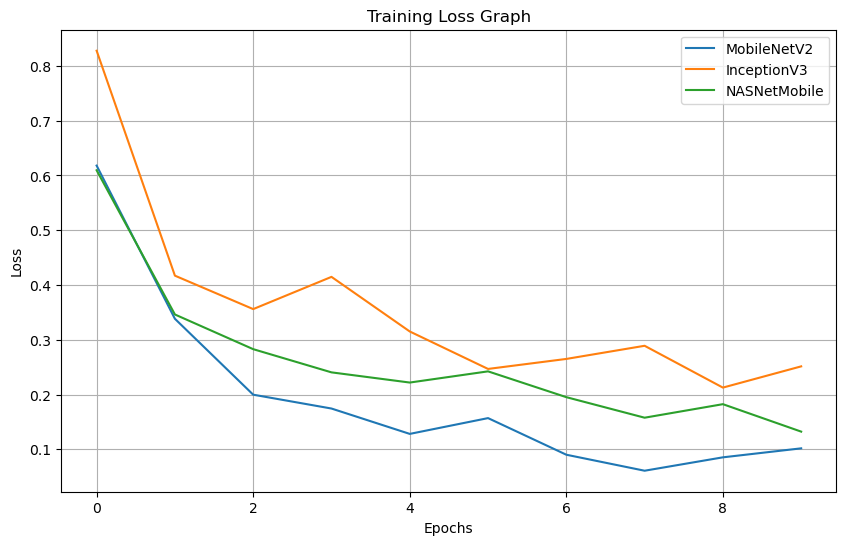

In [46]:
# Plotting training loss
plt.figure(figsize=(10, 6))
for loss in combined_loss:
    plt.plot(range(len(loss)), loss)

plt.title('Training Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['MobileNetV2', 'InceptionV3', 'NASNetMobile'], loc='upper right')
plt.grid(True)
plt.show()

In [56]:
from sklearn.metrics import confusion_matrix, recall_score
import pandas as pd

# Fungsi untuk menghitung spesifisitas dari confusion matrix
def calculate_specificity(cm):
    TN = cm[0, 0]
    FP = cm[0, 1]
    return TN / (TN + FP)

# Menampilkan tabel perbandingan untuk metrik model MobileNetV2, InceptionV3, dan NASNetMobile
metrics = {
    'MobileNetV2': {
        'accuracy': history_mobilenet.history['accuracy'][-1],
        'recall': recall_score(true_classes_mobilenet, y_pred_mobilenet, average='weighted'),
        'specificity': None  # Placeholder for specificity
    },
    'InceptionV3': {
        'accuracy': history_inception.history['accuracy'][-1],
        'recall': recall_score(true_classes_inception, y_pred_inception, average='weighted'),
        'specificity': None  # Placeholder for specificity
    },
    'NASNetMobile': {
        'accuracy': history_nasnetmobile.history['accuracy'][-1],
        'recall': recall_score(true_classes_nasnetmobile, y_pred_nasnetmobile, average='weighted'),
        'specificity': None  # Placeholder for specificity
    }
}

# Menghitung spesifisitas untuk setiap model
for model_name, data in metrics.items():
    if model_name == 'MobileNetV2':
        cm = confusion_matrix(true_classes_mobilenet, y_pred_mobilenet)
    elif model_name == 'InceptionV3':
        cm = confusion_matrix(true_classes_inception, y_pred_inception)
    elif model_name == 'NASNetMobile':
        cm = confusion_matrix(true_classes_nasnetmobile, y_pred_nasnetmobile)
    
    specificity = calculate_specificity(cm)
    metrics[model_name]['specificity'] = specificity

# Menampilkan tabel perbandingan
metrics_df = pd.DataFrame.from_dict(metrics, orient='index')
print(metrics_df)

              accuracy    recall  specificity
MobileNetV2    0.96875  0.954955     0.909091
InceptionV3    0.90625  0.873874     0.742857
NASNetMobile   0.93750  0.957958     0.981132
